In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio as rio
import random

In [2]:
gt_tiff_path = "./data/Danubio/changes_clipped_v3.tif"

GT_path = gt_tiff_path
with rio.open(GT_path) as src:
    ground_truth = src.read().squeeze()
    profile = src.profile


In [3]:
ground_truth2 = ground_truth.copy()

ground_truth2[ground_truth2<0] = 2

np.unique(ground_truth2, return_counts=True)

(array([0., 1., 2.], dtype=float32),
 array([ 68981, 272163, 388228], dtype=int64))

In [4]:
mask = np.zeros_like(ground_truth)
mask[ground_truth==0] = 1


In [15]:
ones_indices = np.where(ground_truth == 1)

# Randomly select 10% of the ones
num_ones = len(ones_indices[0])
num_random_ones = int(0.01 * num_ones)
random_indices = np.random.choice(num_ones, size=num_random_ones, replace=False)

# Set the randomly selected ones in the mask
mask[ones_indices[0][random_indices], ones_indices[1][random_indices]] = 1

No change:68981
Change:2721


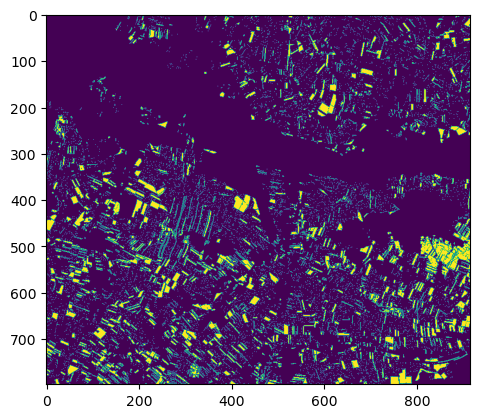

In [16]:
print(f'No change:{len(np.where(ground_truth == 0)[0])}')
print(f'Change:{num_random_ones}')

plt.imshow(mask)

In [17]:
gt_mask_path = "./data/Danubio/changes_clipped_v3_masked_1percent.tif"

with rio.open(gt_mask_path, 'w', **profile) as dst:
    dst.write(mask, 1)

In [14]:
from scipy.io import savemat

mat_mask = {'train_mask' : mask}
savemat(gt_mask_path.replace('.tif','.mat'), mat_mask)